In [2]:
from osh5vis import osplot
from os_utils import gather_diags, time_series, movie, streak_plot
import numpy as np
import matplotlib.pyplot as plt
# from IPython.display import HTML, IFrame

### Let's analyze our quasi-2D MagShockZ simulation. First load in data and save diagnostics paths to a dictionary.

In [3]:
data_dir = '/home/dschneidinger/MagShockZ/magshockz-v2.21.2d/MS'
# This creates a dictionary object that points to every diagnostic directory. Just a really nice QOL improvement
diagnostics = gather_diags(data_dir)
print(diagnostics)

{'FLD/e2': '/home/dschneidinger/MagShockZ/magshockz-v2.21.2d/MS/FLD/e2/', 'FLD/e3': '/home/dschneidinger/MagShockZ/magshockz-v2.21.2d/MS/FLD/e3/', 'FLD/e1': '/home/dschneidinger/MagShockZ/magshockz-v2.21.2d/MS/FLD/e1/', 'FLD/b2': '/home/dschneidinger/MagShockZ/magshockz-v2.21.2d/MS/FLD/b2/', 'FLD/b3': '/home/dschneidinger/MagShockZ/magshockz-v2.21.2d/MS/FLD/b3/', 'FLD/b1': '/home/dschneidinger/MagShockZ/magshockz-v2.21.2d/MS/FLD/b1/', 'PHA/p1x1/electrons': '/home/dschneidinger/MagShockZ/magshockz-v2.21.2d/MS/PHA/p1x1/electrons/', 'PHA/p1x1/silicon': '/home/dschneidinger/MagShockZ/magshockz-v2.21.2d/MS/PHA/p1x1/silicon/', 'PHA/p1x1/aluminum': '/home/dschneidinger/MagShockZ/magshockz-v2.21.2d/MS/PHA/p1x1/aluminum/', 'PHA/p2x2/electrons': '/home/dschneidinger/MagShockZ/magshockz-v2.21.2d/MS/PHA/p2x2/electrons/', 'PHA/p2x2/silicon': '/home/dschneidinger/MagShockZ/magshockz-v2.21.2d/MS/PHA/p2x2/silicon/', 'PHA/p2x2/aluminum': '/home/dschneidinger/MagShockZ/magshockz-v2.21.2d/MS/PHA/p2x2/alu

### Let's start by just measuring the Alfvenic Mach number of our shock

In [9]:
# The perpendicular component of the magnetic field is entirely in b1 (x-direction)
# time_series creates a list of H5Data objects where each index is a different timestep
# Doing it this way makes life a lot easier because then you can use osplot
b1 = time_series(diagnostics['FLD/b1'])

movie(b1)

Using vlimits: (osh5def.H5Data at 0x73fab56e8c50, shape(),
axis:
  None
data_attrs: {'LONG_NAME': 'B_1', 'UNITS': osh5def.OSUnits at 0x73fc3201fd40: ('m_e', 'c', '\\omega', 'e', 'n_0')=(1, 1, 1, -1, 0), 'NAME': 'b1'}
run_attrs:{'simdir': '/home/dschneidinger/MagShockZ/magshockz-v2.21.2d', 'dirname': '/home/dschneidinger/MagShockZ/magshockz-v2.21.2d/MS/FLD/b1', 'extension': '.h5', 'ITER': array([144896], dtype=int32), 'NAME': 'b1', 'OFFSET_T': array([0.]), 'OFFSET_X': array([0. , 0.5]), 'TIME': array([29268.992]), 'TIME UNITS': osh5def.OSUnits at 0x73fc3201c280: ('m_e', 'c', '\\omega', 'e', 'n_0')=(0, 0, -1, 0, 0), 'TYPE': 'grid', 'SIMULATION': {'COMPILE_TIME': array([b'Jul 22 2025 18:15:25'], dtype='|S1024'), 'DT': array([0.202]), 'GIT_VERSION': array([b'4.4.4-301-g83444b7-dirty'], dtype='|S1024'), 'INPUT_FILE': array([b'testing_writeout.txt'], dtype='|S1024'), 'INPUT_FILE_CRC32': array([5.50565684e+08]), 'MOVE C': array([0, 0], dtype=int32), 'NDIMS': array([2], dtype=int32), 'NX': arr

In [5]:
b1_savg = [b1i.mean(axis=1) for b1i in b1]
movie(b1_savg)

Using vlimits: (osh5def.H5Data at 0x7efe51a6fad0, shape(),
axis:
  None
data_attrs: {'LONG_NAME': 'B_1', 'UNITS': osh5def.OSUnits at 0x7efe51c1d090: ('m_e', 'c', '\\omega', 'e', 'n_0')=(1, 1, 1, -1, 0), 'NAME': 'b1'}
run_attrs:{'simdir': '/home/dschneidinger/MagShockZ/magshockz-v2.21.2d', 'dirname': '/home/dschneidinger/MagShockZ/magshockz-v2.21.2d/MS/FLD/b1', 'extension': '.h5', 'ITER': array([144896], dtype=int32), 'NAME': 'b1', 'OFFSET_T': array([0.]), 'OFFSET_X': array([0. , 0.5]), 'TIME': array([29268.992]), 'TIME UNITS': osh5def.OSUnits at 0x7efe51a4b430: ('m_e', 'c', '\\omega', 'e', 'n_0')=(0, 0, -1, 0, 0), 'TYPE': 'grid', 'SIMULATION': {'COMPILE_TIME': array([b'Jul 22 2025 18:15:25'], dtype='|S1024'), 'DT': array([0.202]), 'GIT_VERSION': array([b'4.4.4-301-g83444b7-dirty'], dtype='|S1024'), 'INPUT_FILE': array([b'testing_writeout.txt'], dtype='|S1024'), 'INPUT_FILE_CRC32': array([5.50565684e+08]), 'MOVE C': array([0, 0], dtype=int32), 'NDIMS': array([2], dtype=int32), 'NX': arr

v_A is very approx 0.0023135818311826747 c
Therefore the Mach number is very approx 21.61151134837561


/tmp/ipykernel_427021/3322962071.py:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  norm_b1 = np.array([b / b1_savg[0][-20] for b in b1_savg])


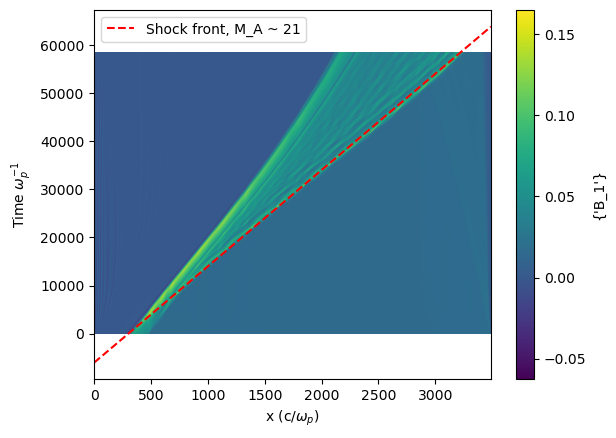

In [19]:
streak_plot(b1_savg)

# Get the normalized B1 data as a 2D numpy array
norm_b1 = np.array([b / b1_savg[0][-20] for b in b1_savg])

# # Choose a representative x-index (e.g., center of the domain)
x_idx = norm_b1.shape[0] // 2
y = norm_b1[:, x_idx]
t = np.linspace(b1_savg[0].run_attrs['SIMULATION']['XMIN'][-1], b1_savg[-1].run_attrs['SIMULATION']['XMAX'][-1], len(norm_b1))
# print(b1_savg[-1].run_attrs)

# # Fit a line to the data
slope, intercept = 20, -6000
mass_ratio = 38
v_A = b1_savg[0][-20] / np.sqrt(1.5*mass_ratio)
print(f"v_A is very approx {v_A} c")
print(f"Therefore the Mach number is very approx {1/(slope*v_A)}")
plt.plot(t, slope * t + intercept, 'r--', label=f'Shock front, M_A ~ {int(1/(slope*v_A))}')


plt.legend()


In [ ]:
p_limit = [0, -1]
x_limit = [200, -600]
t_limit = [100, -300]
al_p2x2 = time_series(diagnostics['PHA/p2x2/aluminum'])
si_p2x2 = time_series(diagnostics['PHA/p2x2/silicon'])

log_si_p2x2 = [np.log(si_p2x2i)[p_limit[0]:p_limit[1], x_limit[0]:x_limit[1]] for si_p2x2i in si_p2x2]
log_al_p2x2 = [np.log(al_p2x2i)[p_limit[0]:p_limit[1], x_limit[0]:x_limit[1]] for al_p2x2i in al_p2x2]
movie(log_al_p2x2[t_limit[0]:t_limit[1]], vlimits = [0,8])

/tmp/ipykernel_102941/2710958093.py:5: RuntimeWarning: divide by zero encountered in log
  log_al_p2x2 = [np.log(al_p2x2i)[p_limit[0]:p_limit[1], x_limit[0]:x_limit[1]] for al_p2x2i in al_p2x2]
/tmp/ipykernel_102941/2710958093.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  log_al_p2x2 = [np.log(al_p2x2i)[p_limit[0]:p_limit[1], x_limit[0]:x_limit[1]] for al_p2x2i in al_p2x2]


Using vlimits: [0, 8]


In [10]:
print(log_al_p2x2[150].min(), log_al_p2x2[0].max())

-inf 8.59956
